In [ ]:
from image_processing import extract_objects
import matplotlib.pyplot as plt

image_path = "equation.png"

resized_images = extract_objects(image_path)

fig, axs = plt.subplots(1, len(resized_images))

for index, resized_image in enumerate(resized_images):

    axs[index].imshow(resized_image, cmap='gray')
    axs[index].axis('off')
plt.show()

In [ ]:
import torch
from symbol_classifier import SymbolClassifier

symbol_classifier = SymbolClassifier()

symbol_classifier.load_state_dict(torch.load("model.pt"))

In [ ]:
expression = ""

for im in resized_images:
    x = torch.tensor(im, dtype=torch.float).unsqueeze(0).unsqueeze(0)
    output = symbol_classifier(x)
    prediction = torch.argmax(output)
    expression += str(prediction.item())

expression

In [ ]:
from expression_evaluation import evaluate_expression

evaluate_expression(expression)

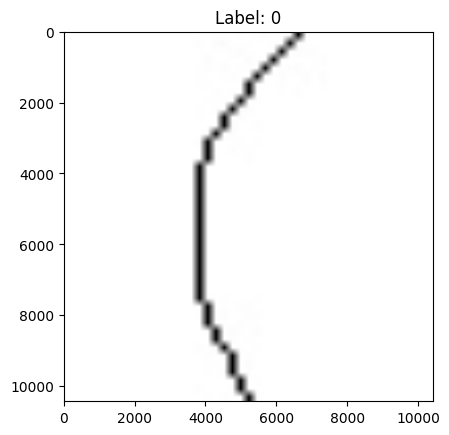

In [5]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

data_dir = "/Users/robinsuxdorf/Documents/Projekte/train_data/"

transform = transforms.Compose([
    transforms.Resize((10428, 10428)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

first_image, first_label = dataset[1]

# Convert the tensor image to a NumPy array and transpose the dimensions
# PyTorch tensors are in (C, H, W) format, we need to convert them to (H, W, C) for plotting
image = first_image.numpy().transpose((1, 2, 0))

# Plot the image
plt.imshow(image)
plt.title(f'Label: {first_label}')
plt.show()